# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Compution vision is a practice of writing computer alogrithms whixh can discover patterns in visual data, such as a cemera of self-driving car, recognizing the car in front.  

## Get the data

The image data we are working with is from the Food 101 dataset: https://www.kaggle.com/datasets/dansbecker/food-101  

However, we modify it to only uses two classes (pizza and steak) using the image data modification notebook, https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

**Note:** We start with a smaller dataset so we can experiment quickly so we can figure out what works or wat doesn't work before scaling up.

In [2]:
import tensorflow as tf

In [3]:
# !wget get the file from the link and download to colab
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2025-08-07 02:39:41--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.188.207, 74.125.142.207, 74.125.195.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.188.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   155MB/s    in 0.7s    

2025-08-07 02:39:41 (155 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



General configuration of the file arrangement
 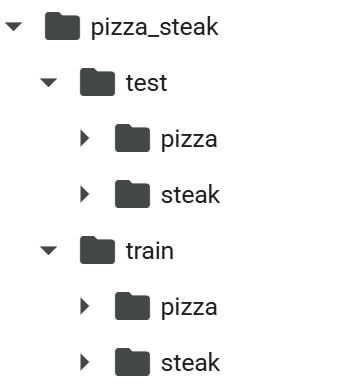

## Inspect the data

A crucial step at the beginning of any machine learning project is to become  familiar with the data.

And fro a computer vision project, this means visualizing many samples of your data.

In [4]:
# !ls pizza_steak means: "In the command line, list the contents of the directory named pizza_steak
!ls pizza_steak

test  train


! (The Exclamation Mark): This is a "shell escape." It tells the notebook to execute the command that follows it directly in the operating system's command-line shell, not as Python code.

ls: This is a standard command on Linux and macOS that stands for list. It lists the contents of a directory.

In [5]:
!ls pizza_steak/train/

pizza  steak


In [6]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [7]:
import os
# Walk through pizza_steak directory and list number of files

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} in images in '{dirpath}'")

There are 2 directories and 0 in images in 'pizza_steak'
There are 2 directories and 0 in images in 'pizza_steak/test'
There are 0 directories and 250 in images in 'pizza_steak/test/pizza'
There are 0 directories and 250 in images in 'pizza_steak/test/steak'
There are 2 directories and 0 in images in 'pizza_steak/train'
There are 0 directories and 750 in images in 'pizza_steak/train/pizza'
There are 0 directories and 750 in images in 'pizza_steak/train/steak'


In [8]:
!ls -1a pizza_steak

.
..
test
train


In [9]:
# Another way to find out how many images are there in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

os.listdir(...) creates a list of all the filenames in the steak training folder.

len() then counts how many filenames are in that list.

The result, 750, is stored in the variable num_steak_images_train.

To visualize our images, first let's get the class names programatically

In [10]:
# To get the class names programatically
import pathlib
import numpy as np

# Create a list of class_names from subdirectory
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))

print(class_names)

['pizza' 'steak']


This code automatically gets the names of all the class subdirectories from the training folder and stores them in a sorted NumPy array

In [11]:
# Let's visualize images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Set up the target directory (view image from here)
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  # Show the shape of the image
  print(f"Image shape:{img.shape}")

  return img

**The matplotlib.image module**

within the Matplotlib library in Python is designed for working with images. Its primary function is to enable the display and manipulation of raster-based images, typically represented as NumPy arrays.

**The random.sample()**

function in Python's random module is used to select a specified number of unique items from a sequence, such as a list, tuple, or string. This function performs sampling without replacement, meaning that once an item has been selected for the sample, it cannot be selected again.

random.sample(population, k, *, counts=None)
* population: The sequence (e.g., list, tuple, string, set) from which to draw the sample.
* k: The number of unique elements to extract from the population.
* counts: (Optional): A sequence of relative weights or absolute frequencies for the elements in population. This parameter is less commonly used than population and k.

**os.listdir()**

function in Python's os module is used to retrieve a list of all files and directories within a specified path.
Functionality:
Returns a list:
It returns a list of strings, where each string represents the name of a file or directory found within the target path.

**imread()**

function in Matplotlib is used to read an image file and load its data into a NumPy array.

**matplotlib.pyplot.imshow()**

is a function within the matplotlib library in Python, specifically used for displaying data as an image. It is a powerful tool for visualizing 2D arrays, matrices, or image data.

['2509017.jpg']
Image shape:(512, 512, 3)


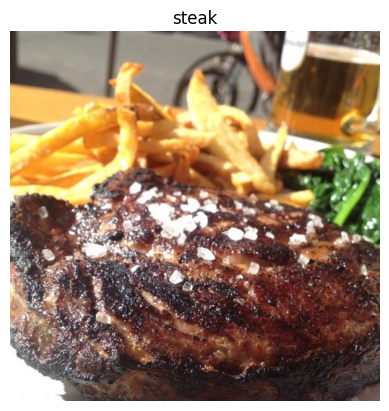

In [12]:
# View a random image from the training dataset
img = view_random_image(target_dir = "pizza_steak/train/", target_class = "steak")

In [13]:
img.dtype

dtype('uint8')

In [14]:
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 50,  39,  35],
        [ 51,  40,  36],
        [ 49,  38,  34],
        ...,
        [113, 104,  87],
        [106,  93,  77],
        [104,  91,  74]],

       [[ 51,  40,  36],
        [ 52,  41,  37],
        [ 50,  39,  35],
        ...,
        [105,  93,  77],
        [103,  90,  73],
        [105,  90,  71]],

       [[ 52,  41,  37],
        [ 52,  41,  37],
        [ 51,  40,  36],
        ...,
        [108,  93,  74],
        [109,  92,  72],
        [110,  93,  73]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [109,  93,  93],
        [108,  92,  92],
        [107,  91,  91]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [110,  94,  94],
        [109,  93,  94],
        [108,  92,  93]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [110,  94,  9

We have preprocess images into tensors, and tensors can be fed into deep learning, **shape = (pixel, pixel,color_channel)**

In [15]:
# View image shape
img.shape

# shape = (width, height. color_channels)

(512, 512, 3)

As discussed before, neural networks prefer value between 0 and 1, so we need to normalize our data

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically, we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in or images
* Compile our CNN
* Fit the CNN to our training data



In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess daat (get all of the pixel valeue between 0 and 1) => scaling / normalization
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# Set up paths to our data directory
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                         batch_size = 32,
                         target_size = (224,224),
                         class_mode = "binary",
                         seed = 42
                        )
valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                        batch_size = 32,
                        target_size = (224,224),
                        class_mode = "binary",
                        seed = 42
                        )

# Build a CNN model (same as Tinay VGG on the CNN explainer website)
model_1 = tf.keras.Sequential([
   # ---- Feature Extraction Base ----
   tf.keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = "relu", input_shape = (224,224,3)),
   tf.keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = "relu"),
   tf.keras.layers.MaxPool2D(pool_size = 2, padding = "valid"),

   tf.keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = "relu"),
   tf.keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = "relu"),
   tf.keras.layers.MaxPool2D(pool_size = 2, padding = "valid"),

   # ---- Classifier Head ----
   tf.keras.layers.Flatten(),
   tf.keras.layers.Dense(1, activation = "sigmoid")

])

# Compile our CNN
model_1.compile(loss = "binary_crossentropy",
        optimizer = tf.keras.optimizers.Adam(),
        metrics = ["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
             epochs = 5,
             steps_per_epoch = len(train_data),
             validation_data = valid_data,
             validation_steps = len(valid_data),
             verbose = 1)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 107s 2s/step - accuracy: 0.5639 - loss: 0.7350 - val_accuracy: 0.8040 - val_loss: 0.4396
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.7831 - loss: 0.4664 - val_accuracy: 0.8100 - val_loss: 0.4267
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.8382 - loss: 0.4178 - val_accuracy: 0.8280 - val_loss: 0.3949
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.8297 - loss: 0.4050 - val_accuracy: 0.8480 - val_loss: 0.3783
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 151s 2s/step - accuracy: 0.8617 - loss: 0.3162 - val_accuracy: 0.8560 - val_loss: 0.3567


Use hardware accelerator to spped up training process (GPU)

In [17]:
# Found 1500 images belonging to 2 classes.
# Found 500 images belonging to 2 classes.

len(train_data), 1500 / 32

(47, 46.875)

In [18]:
# Get a model summary
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

## Using the same model as before

Let's replicate the model we build in the previous section to see if it works for our image data

The model we are building is from [TensorFlow playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,4&seed=0.82806&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

In [19]:
train_data

In [20]:
# Set random ssed
tf.random.set_seed(42)

# Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224,224,3)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

# Compile the model
model_2.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

# Fit the model
history_2 = model_2.fit(train_data,
             epochs = 5,
             steps_per_epoch = len(train_data),
             validation_data = valid_data,
             validation_steps = len(valid_data)
             )

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 152ms/step - accuracy: 0.5034 - loss: 1.4910 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 171ms/step - accuracy: 0.5024 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 149ms/step - accuracy: 0.5044 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 141ms/step - accuracy: 0.5091 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 153ms/step - accuracy: 0.5115 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932


The model_2 using the previous architecture perfoms poorly on image data

In [21]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │       602,116 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

CNN model (model_1): Trainable params: 31,101 (121.49 KB)   
Dense model (model_2): Trainable params: 602,141 (2.30 MB)

Despite having more trainable paraeters for Desne model, the model is not performing as good as CNN model

Impove model_2 -> model_3

In [22]:
# Set random seed
tf.random.set_seed(42)

# Create the model (increase the number of neurons in each Dense layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224,224,3)),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation=  "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

# Compile the model
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
        optimizer = tf.keras.optimizers.Adam(),
        metrics = ['accuracy'])

# Fit the model
history_3 = model_3.fit(train_data,
             epochs = 5,
             steps_per_epoch = len(train_data),
             validation_data = valid_data,
             validation_steps = len(valid_data)
             )

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 25s 491ms/step - accuracy: 0.5460 - loss: 6.4111 - val_accuracy: 0.7320 - val_loss: 0.9639
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 475ms/step - accuracy: 0.7350 - loss: 0.8492 - val_accuracy: 0.5580 - val_loss: 1.1112
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 42s 496ms/step - accuracy: 0.6966 - loss: 0.8145 - val_accuracy: 0.6460 - val_loss: 1.1086
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 40s 475ms/step - accuracy: 0.6649 - loss: 0.9329 - val_accuracy: 0.7120 - val_loss: 0.6453
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 40s 464ms/step - accuracy: 0.7589 - loss: 0.5582 - val_accuracy: 0.7900 - val_loss: 0.4663


In [23]:
# Ge the summary
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │    15,052,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,219,605 (172.50 MB)

 Trainable params: 15,073,201 (57.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,146,404 (115.00 MB)

⭐**Note:**

**CNN model (model_1)**: **Trainable params: 31,101** (121.49 KB) **accuracy: 0.8615** - loss: 0.3307 - val_accuracy: 0.8060 - val_loss: 0.4127

**Dense 4 model (model_2)**: **Trainable params: 602,141** (2.30 MB) **accuracy: 0.5237** - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.6932

**Dense 100 model (model_3)**: **Trainable params: 15,073,201** (57.50 MB) **accuracy: 0.7799** - loss: 0.5127 - val_accuracy: 0.7860 - val_loss: 0.4674


⭐**Note:**

You can think of **trainable parameters as patterns a model can learn from data**, You might think more is better, and in lots of cases, it is. But in this case, the difference here is the two different styles of model we are using, where a desne layers has a number of learnable parameters connected to each other, and hence a larger number of possible learnable patterns, **a convolutional neural network seek to sort out and learn the most mportant patterns in an image**. So even though these are these are less learnablen parameters in our convolutional neural networks these are often more helpful in deciphering between different **features** in an image.      

## Binary Classification: Let's break it down

1. Visualize the data
2. Preprocess the data (scaling/normalization) and turn our data into batches
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust parameters and improve the model (improve the baseline)
7. Repeat with experiments

### 1. Visualize the data

['1594719.jpg']
Image shape:(512, 512, 3)
['2491110.jpg']
Image shape:(384, 512, 3)


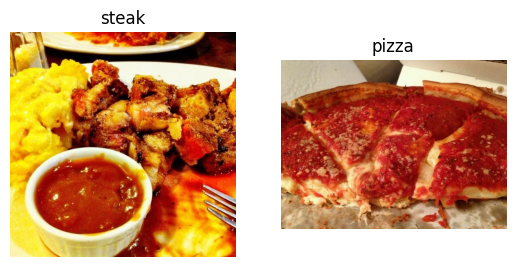

In [24]:
# Visualize the data (familiar with the data)
import matplotlib.pyplot as plt

plt.figure()
plt.subplot(1,2,1)
steak_image = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
steak_image = view_random_image("pizza_steak/train/", "pizza")

### Preprocess the data (prepare it for the mdoel)

In [25]:
# define directory dataset path
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test"

Our next step is to turn our data into **batches**

batch is a smaller subset of data, rather tan looking at all images at one time, a model, a model could only look at "batch number" (ex. 32) at a time

It does this for a couple of reasons:
1. 10000 or more images might fi into the memory of your processer (GPU),
2. Trying to learn the patterns of 10000 images in one hit could result in the model not being not able to learn very well
3. 32 is the most commonly used batch size

In [26]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale =1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

ImageDataGenerator: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [27]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,    # This tells the generator where to find the images.
                         target_size = (224,224),   # This resizes every image to a fixed size of 224x224 pixels
                         class_mode = "binary",    # This specifies how to generate the labels.
                         batch_size = 32)       # This sets the number of images to be processed in each group or batch

# valid_data = ....(add valid data if necessary)

test_data = test_datagen.flow_from_directory(directory = test_dir,
                        target_size = (224,224),
                        class_mode = "binary",
                        batch_size = 32)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


**flow_from_directory**

* Loads Images: It reads image files directly from a specified directory.

* Assigns Labels Automatically: It infers the class labels for the images based on the subdirectory names they are in.

* Applies Preprocessing: It applies all the transformations (like rescaling and data augmentation) defined in its ImageDataGenerator.

* Generates Batches: It groups the images and their labels into batches to feed into a model efficiently, without loading the entire dataset into memory.

* Creates a Generator: It returns a Python generator object that yields batches of data, which can be passed directly to a model's training function.

In [28]:
# Get a sample of train data batch
images, labels = next(train_data)    # get the next batch if image/labels in train_data
len(images), len(labels)

(32, 32)

**The train_data object** is a generator that produces data in batches on demand.

The **next()** method commands the generator to yield the next available batch.

This batch consists of a tuple containing two elements:

* A collection of image data, which is assigned to the **images variable**.

* The corresponding labels for those images, which are assigned to the **labels variable.**





In [29]:
# How many batches are there?
len(train_data)               # 1500/32 (batch_size = 32)

47

In [30]:
# Get the first 2 images
images[:2], images[0].shape
# shape = (224,224,3) previously set with target shape

(array([[[[0.56078434, 0.63529414, 0.79215693],
          [0.5647059 , 0.6392157 , 0.7960785 ],
          [0.5647059 , 0.6392157 , 0.80392164],
          ...,
          [0.07843138, 0.08235294, 0.05882353],
          [0.08235294, 0.08235294, 0.07450981],
          [0.09803922, 0.09803922, 0.09803922]],
 
         [[0.5647059 , 0.6392157 , 0.7960785 ],
          [0.5568628 , 0.6313726 , 0.7960785 ],
          [0.5568628 , 0.6313726 , 0.7960785 ],
          ...,
          [0.09803922, 0.10196079, 0.07058824],
          [0.0627451 , 0.06666667, 0.04705883],
          [0.04313726, 0.04313726, 0.03529412]],
 
         [[0.5686275 , 0.6431373 , 0.8078432 ],
          [0.5647059 , 0.6392157 , 0.80392164],
          [0.5647059 , 0.6392157 , 0.8078432 ],
          ...,
          [0.07450981, 0.07843138, 0.04705883],
          [0.15686275, 0.16078432, 0.13725491],
          [0.21568629, 0.21960786, 0.20000002]],
 
         ...,
 
         [[0.3921569 , 0.34901962, 0.22352943],
          [0.39607

In [31]:
# view the first batches of labels
labels, labels.shape
# 0, 1 stands for pizza or steak

(array([0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0.,
        0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1.],
       dtype=float32),
 (32,))

### Create a CNN model (start with a baseline)

A baseline is relatively a simple model or existing result that you set up when beginning a machione learning eperiment, and as you keep experimenting, you try to beat the baseline

**Note:**

In deep learning, there is almost an infinite amount of architectures you could create. So one of the best way to get started is to start with something simple and see if it works on your data and then imntroduce complexity as required (e.g. look at which current model is perfoming best in the field for your problem))


In [32]:
# Let's make creating our model easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [33]:
# Create the model (this will be our baseline, a layer convolutional neural network)
tf.random.set_seed(42)

model_4 = Sequential([
      Conv2D(
          filters = 10,        # the number of sliding window
          kernel_size = 3,       # the size of the sliding window
          strides = 1,         # by default = 1, size of step the window slieds
          padding = "valid",      # by default = valid, if same (output_shape = input_shape), if valid, output_shape is compressed
          activation = "relu",
          input_shape = (224,224,3)  # input layer specify input shape
          ),
      Conv2D(10, 3, activation = "relu"),
      Conv2D(10, 3, activation = "relu"),
      Flatten(),               # takes the final 2D feature maps into a single, long 1D vector.
      Dense(1, activation = "sigmoid")   # output layer (1 nueron for binary classification)
      ])

**filters:** Sets the number of feature detectors (or patterns) the layer will learn.

**kernel_size:** Defines the size (e.g., 3x3 pixels) of the sliding window that scans the image for features.

**strides:** The step size, in pixels, that the kernel moves across the image.

**padding:** The strategy for handling image borders. "valid" means no padding, while "same" adds padding to preserve the image size.

**activation:** The function, like "relu", applied after the convolution to introduce non-linearity, allowing the model to learn complex patterns.

**input_shape:** The dimensions (height, width, color channels) of the input images, required only for the first layer of the model.

**Resource:** Visulization of CNN model:

https://www.youtube.com/watch?v=JboZfxUjLSk

https://www.youtube.com/watch?v=jDe5BAsT2-Y

https://www.youtube.com/watch?v=JboZfxUjLSk

**Resource:** CNN expalainer:

https://poloclub.github.io/cnn-explainer/


In [34]:
# Conpile the model
model_4.compile(loss = 'binary_crossentropy',
        optimizer = Adam(),
        metrics = ['accuracy'])

In [35]:
# Get a summary of the model
model_4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 218, 218, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 475240)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │       475,241 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 477,341 (1.82 MB)

 Trainable params: 477,341 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

As it goes through the convolution btwork, it losses the edges (with decreased shape) sinec the padding is set at "valid"

### Fit the model

In [36]:
# Check the length of train and test generators (batch_size = 32, train_data_size = 1500, test_data_size=500)
len(train_data), len(test_data), 1500/32, 500/32

(47, 16, 46.875, 15.625)

In [37]:
# Fit the model
history_4 = model_4.fit(train_data,   # combination of label and sample data
             epochs = 5,
             steps_per_epoch = len(train_data),
             validation_data = test_data,
             validation_steps = len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 129s 3s/step - accuracy: 0.6051 - loss: 1.0064 - val_accuracy: 0.8440 - val_loss: 0.3982
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 140s 3s/step - accuracy: 0.8491 - loss: 0.3826 - val_accuracy: 0.8560 - val_loss: 0.3499
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 124s 3s/step - accuracy: 0.9339 - loss: 0.2054 - val_accuracy: 0.8420 - val_loss: 0.3656
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 143s 3s/step - accuracy: 0.9785 - loss: 0.0983 - val_accuracy: 0.8540 - val_loss: 0.3665
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 124s 3s/step - accuracy: 0.9999 - loss: 0.0197 - val_accuracy: 0.8720 - val_loss: 0.3770



**How Images and Labels are Packaged**

The notebook uses the ImageDataGenerator to automatically load and label images from a directory.

1. **Automatic Labeling:** The **flow_from_directory()** function is the key. It scans the specified directory (train_dir) and automatically uses the names of the subfolders (pizza and steak) as the labels for all the images within them.

2. **Label Formatting:** The argument **class_mode="binary"** tells the function to convert these folder names into binary numbers (0 and 1), which is the format the model needs for binary classification.

3. **Batch Creation:** The final train_data object is a generator. It doesn't load all images at once. Instead, it feeds the model small batches (groups of 32) of images and their corresponding 0 or 1 labels during the training process.

### 5. Evaluate our model

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
history_4.history

{'accuracy': [0.6466666460037231,
  0.8473333120346069,
  0.9246666431427002,
  0.9819999933242798,
  0.9993333220481873],
 'loss': [0.7435122132301331,
  0.37410208582878113,
  0.21331630647182465,
  0.08286786079406738,
  0.017315197736024857],
 'val_accuracy': [0.843999981880188,
  0.8560000061988831,
  0.8420000076293945,
  0.8539999723434448,
  0.871999979019165],
 'val_loss': [0.39818257093429565,
  0.34990614652633667,
  0.36558258533477783,
  0.3665148615837097,
  0.37703609466552734]}

Text(0.5, 0, 'epochs')

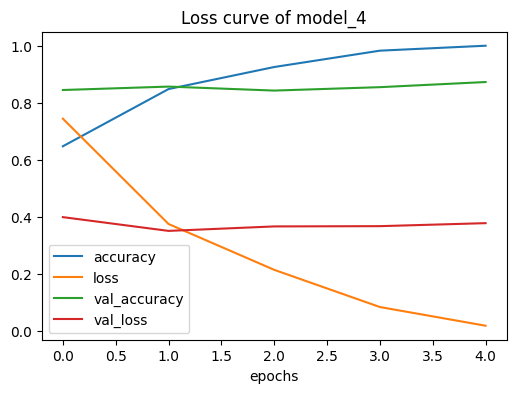

In [40]:
# Plot the training curves
pd.DataFrame(history_4.history).plot(figsize = (6,4))
plt.title("Loss curve of model_4")
plt.xlabel("epochs")

In [41]:
# Plot the validation and training curve seperately
def plot_loss_curve(history):

  """ Return seperate loss curves for training and validation metrics"""

  # define losses
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  # define accuracy
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  # define epochs (how many epochs we run for)
  epochs = range(len(history.history["loss"]))

  # plot loss, val_loss
  plt.figure(figsize = (5,3))
  plt.plot(epochs, loss, label = "Training loss")
  plt.plot(epochs, val_loss, label = "Validation loss")
  plt.title("Loss vs, epoch")
  plt.xlabel("epochs")
  plt.legend()

  # plot accuracy, val_accuracy
  plt.figure(figsize = (5,3))
  plt.plot(epochs, accuracy, label = "Training accuracy")
  plt.plot(epochs, val_accuracy, label = "Validation accuracy")
  plt.title("Accuracy vs, epoch")
  plt.xlabel("epochs")
  plt.legend()

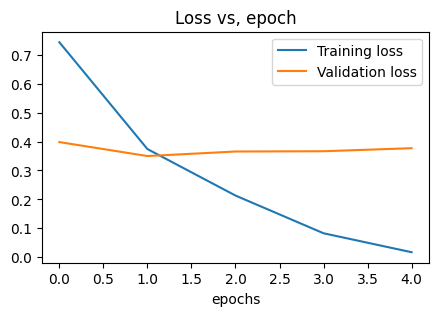

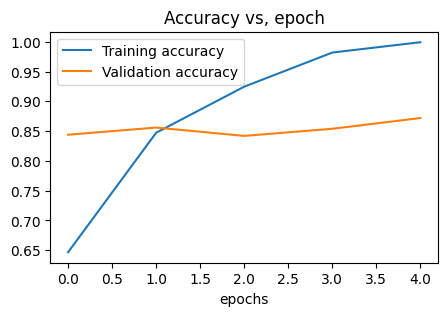

In [42]:
# Check out the value ad acccuracy of model_4
plot_loss_curve(history_4)

**Note:**

When a model's **validation_loss start to increase**, it's likely the model is **overfitting the training data**. This means, ut's learning the patterns in the training dataset too well and failed to generalize the unssen data.

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:
0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:
* Increase the number of Conv layers
* Increase the nmber of Conv filters
* Add another Desne layer to the output of the flattened layer

Reduce overfitting:
* Add data argumentation
* Add regularization layer (such as MaxPool2D)
* Add more data.....

**Note:**

reduce overfitting is also known as **regularization**

In [43]:
# Create a model (a new baseline)

# Set random seed
tf.random.set_seed(42)

# Create a mdoel
model_5 = Sequential([
    Conv2D(10, 3, activation = "relu", input_shape = (224,224,3)),
    MaxPool2D(pool_size = (2,2)),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),                              # (2,2) by default
    Conv2D(10,3, activation = "relu"),
    MaxPool2D(),

    Flatten(),
    Dense(1, activation = "sigmoid")
    ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Maxpool dimension reduction:

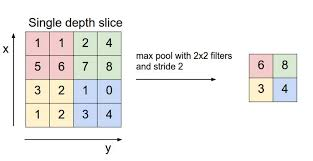

In [44]:
# Compile the model
model_5.compile(
    loss = "binary_crossentropy",
    optimizer = "Adam",
    metrics = ["accuracy"]
)

In [45]:
# Fit the mdoel
history_5 = model_5.fit(train_data,
             epochs = 5,
             steps_per_epoch = len(train_data),
             validation_data = test_data,
             validation_steps = len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.5635 - loss: 0.6704 - val_accuracy: 0.7940 - val_loss: 0.5000
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.7923 - loss: 0.4816 - val_accuracy: 0.7840 - val_loss: 0.4432
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.8069 - loss: 0.4242 - val_accuracy: 0.8520 - val_loss: 0.3628
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.8209 - loss: 0.3957 - val_accuracy: 0.8700 - val_loss: 0.3304
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.8218 - loss: 0.3766 - val_accuracy: 0.8420 - val_loss: 0.3577


In [46]:
# Get a summary (model_5 with MaxPooling)
model_5.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 109, 109, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 52, 52, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 26, 26, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 6760)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │         6,761 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

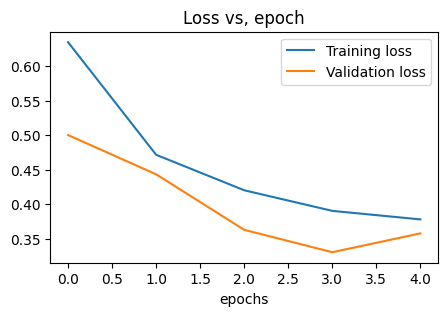

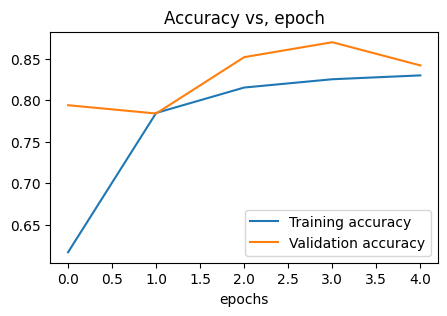

In [47]:
# Plot loss curve
plot_loss_curve(history_5)

model_4 Accuracy: val_accuracy: 0.8440

model_5 Accuracy: val_accuracy: 0.8300

Maxpooling may reduce too many information in this simple problem, While model_5 is much more computationally efficient (it has far fewer trainable parameters: 8,861 vs. 477,341), this efficiency came at the cost of losing key information, which resulted in slightly lower validation accuracy.

### Finding data argumentation

**The ImageDataGenerator** is a tool in Keras/TensorFlow used to prepare image data for training models. Its main purpose is to **perform data augmentation** and generate batches of images on the fly.

1. **Data Augmentation:** It creates modified versions of your training images by applying random transformations like rotations, shifts, zooms, and flips. This makes your dataset larger and more diverse, which helps prevent the model from overfitting.

2. **Batch Generation:** Instead of saving all the augmented images, it generates small batches of processed images as needed during training. This is memory-efficient, especially for large datasets.

3. **flow_from_directory Method:** This useful function automatically reads images from organized folders, assigning labels based on the folder names, and feeding them to the model in batches.

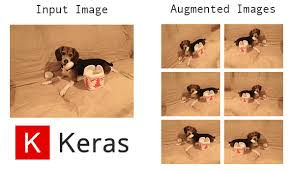

In [48]:
# Create ImageDataGenerator training instance with data argumentation
train_datagen_argumented = ImageDataGenerator(rescale = 1/255.,
                        rotation_range = 0.2, # how much rotation
                        shear_range = 0.2, # how much shear on an image
                        zoom_range = 0.2, # zoom randomly on an image
                        width_shift_range = 0.2, # move the image on x
                        height_shift_range = 0.3, # move the image on y
                        horizontal_flip = True) # flip an image or not

# Create ImageDataGenerator training instance without data argumentation
train_datagen = ImageDataGenerator(rescale = 1/255.)

# Create ImageDataGenerator without data argumentation for the test dataset
test_datagen = ImageDataGenerator(rescale = 1/255.)

**Question:** What is data argumentation?

Data argumentation is a process of altering our training data, leading it to have more diversity and in turn allowin gour models to learn morev generalizable patterns.Alterning might mean randomly rotating an image, flipping it, cropping it, or something similar.

Let's write some code to visualize data argumentation.

In [49]:
# Import data and argument it from trainign directory
print("Argumented training data")
train_data_argumented = train_datagen_argumented.flow_from_directory(train_dir,
                                    target_size=(224, 224),
                                    batch_size=32,
                                    class_mode="binary",
                                    shuffle=False  # for demostration only
                                    )

# Create non-argumented train data batches
print("Non-argumented training data")
train_data = train_datagen.flow_from_directory(train_dir,
                        target_size=(224, 224),
                        batch_size=32,
                        class_mode="binary",
                        shuffle=False
                        )

# Create non-argumented test data batches
print("Non-argumented test data")
test_data = test_datagen.flow_from_directory(test_dir,
                       target_size=(224, 224),
                       batch_size=32,
                       class_mode="binary",
                       shuffle=True
                       )

Argumented training data
Found 1500 images belonging to 2 classes.
Non-argumented training data
Found 1500 images belonging to 2 classes.
Non-argumented test data
Found 500 images belonging to 2 classes.


The shuffle parameter in Keras's flow_from_directory function controls whether the order of the data samples generated by the ImageDataGenerator is randomized.

**Note:** Data argumentation is usually only performed on the training data, using "ImageDataGenerator" built-in data argumetation parameters, our images are left as they are in the directories but are modified as they're loaded into the model.   

Let's visualize somea argumented data !!

In [50]:
# Visualize sample batches
images, labels = next(train_data)

# Visualize argumented sample batches
argumented_images, argumented_labels = next(train_data_argumented)    # labels are not argumented, only data (images)

showing image number 22
showing argumented_image number 22


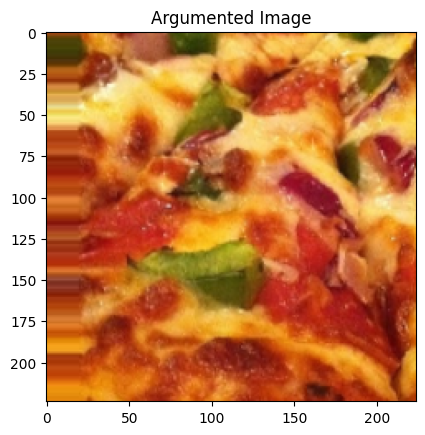

In [51]:
# randomly show the original images and argumented images
import random
random_number = random.randint(0,31)     # batch_size = 32

print(f"showing image number {random_number}")
plt.imshow(images[random_number])
plt.title("Original Image")
plt.axis = False

print(f"showing argumented_image number {random_number}")
plt.imshow(argumented_images[random_number])
plt.title("Argumented Image")
plt.axis = False

Now we have seen how argumented data looks like, let's build a model and see how it learns on argumented data.

In [52]:
# Create a model (same as model_5 but trained on argumented data)
model_6=Sequential([
    Conv2D(filters=10, kernel_size = 3, activation = "relu", input_shape = (224,224,3)),
    MaxPool2D(pool_size = (2,2)),
    Conv2D(filters=10, kernel_size = 3, activation = "relu"),
    MaxPool2D(pool_size = (2,2)),
    Conv2D(filters=10, kernel_size = 3, activation = "relu"),
    MaxPool2D(pool_size = (2,2)),
    Flatten(),
    Dense(1, activation = "sigmoid")
])

# Compile the model
model_6.compile(
    loss = "binary_crossentropy",
    optimizer = "Adam",
    metrics = ['accuracy'])

# Fit the data (Fittig model_6 on argumented training data)
history_6 = model_6.fit(train_data_argumented,
        epochs = 5,
        steps_per_epoch = len(train_data_argumented),
        validation_data = test_data,
        validation_steps = len(test_data)
        )

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.3929 - loss: 0.7228 - val_accuracy: 0.5200 - val_loss: 0.6930
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.4132 - loss: 0.6944 - val_accuracy: 0.5040 - val_loss: 0.6930
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.6276 - loss: 0.6923 - val_accuracy: 0.4800 - val_loss: 0.6929
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.5813 - loss: 0.6927 - val_accuracy: 0.4960 - val_loss: 0.6927
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.4554 - loss: 0.6934 - val_accuracy: 0.5240 - val_loss: 0.6917


Use case for sigmoid and softmax activation functions:

1. **Sigmoid for Binary Classification** (A single probability value between 0 and 1.	)

> The sigmoid activation function takes any real number and squashes it into a value between 0 and 1.

2. **Softmax for Multi-Class Classification** (A vector of probabilities that sum to 1. Multually exclusive)


> The softmax function takes a vector of numbers (logits) and turns it into a probability distribution, where all the output values sum up to 1.

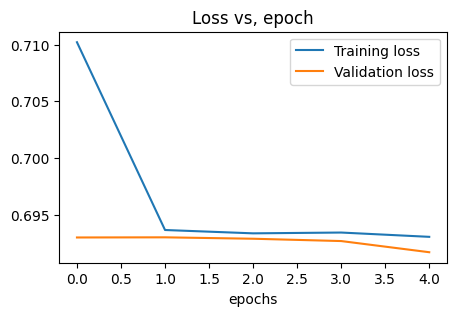

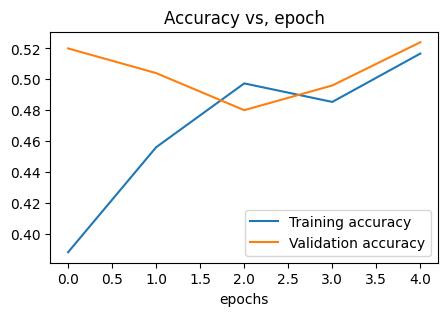

In [53]:
# Check our model's training curve
plot_loss_curve(history_6)

Let's shuffle our argumented training data and tarin another model(same as before) to see what happens

In [54]:
# Import data and argument it and shiffle it from training directory

In [55]:
# data processing
train_data_argumented_shuffled = train_datagen.flow_from_directory(train_dir,
                                   target_size = (224,224),    # resize all images to (224,224)
                                   class_mode = 'binary',
                                   batch_size = 32,
                                   shuffle = True
                                   )

Found 1500 images belonging to 2 classes.


In [56]:
# Create the model
model_7 = Sequential([
    Conv2D(filters=10, kernel_size=3, activation = "relu", input_shape = (224,224,3)),
    MaxPool2D(pool_size = (2,2)),
    Conv2D(filters=10, kernel_size=3, activation = "relu"),
    MaxPool2D(pool_size = (2,2)),
    Conv2D(filters=10, kernel_size=3, activation = "relu"),
    MaxPool2D(pool_size = (2,2)),

    Flatten(),
    Dense(1, activation = "sigmoid")
])

# Compile the mdoel
model_7.compile(loss = "binary_crossentropy",
        optimizer = "Adam",
        metrics = ["accuracy"]
        )

**target_size:** makes sure your data is formatted correctly.**(image data processing)**

**input_shape:** makes sure your model is built to accept that format.**(model creation)**

In [57]:
# Fit the model
history_7 = model_7.fit(train_data_argumented_shuffled,
             epochs = 5,
             steps_per_epoch = len(train_data_argumented_shuffled),    # fitting on argumened and shuffled data
             validation_data = test_data,
             validation_steps = len(test_data)
             )

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.5270 - loss: 0.6803 - val_accuracy: 0.6840 - val_loss: 0.5569
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.7483 - loss: 0.5142 - val_accuracy: 0.7820 - val_loss: 0.4343
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.7835 - loss: 0.4558 - val_accuracy: 0.7900 - val_loss: 0.4233
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.8155 - loss: 0.4191 - val_accuracy: 0.8140 - val_loss: 0.3919
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.8221 - loss: 0.4100 - val_accuracy: 0.8640 - val_loss: 0.3312


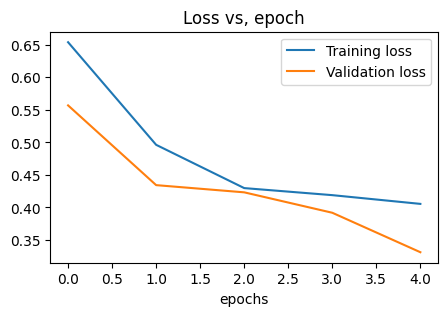

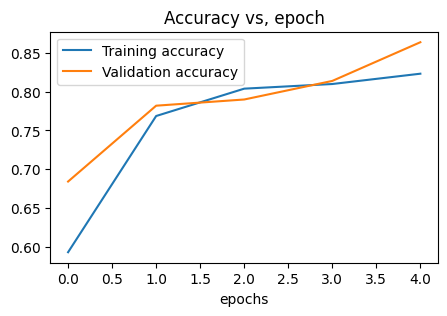

In [58]:
# Check our model's training curve
plot_loss_curve(history_7)

### 7. Repeat until satisfied

Since we have already beaten our baseline model there a a few things we can try to continue to improve our model.

* Increase the number of model layers (add more Conv2D or Max2D)
* Increase the number of filters in convolutional layers (from 10 to 32. 64....)
* Train for longer (more epochs)
* Find the ideal learning rate
* Get more data
* Use **transfer learning** to leverage what another image model has learned and adjust it for our use case



**Practice** - Improving the model by using more filters

In [59]:
# Create the model
model_8 = Sequential([
            Conv2D(32, 3, activation = "relu", input_shape = (224,224,3)),
            MaxPool2D(),
            Conv2D(32, 3, activation = "relu"),
            MaxPool2D(),
            Conv2D(32, 3, activation = "relu"),

            Flatten(),
            Dense(1, activation = "sigmoid")
           ])

# Compile the model
model_8.compile(loss = "binary_crossentropy",
        optimizer = "Adam",
        metrics = ['accuracy']
        )

# Fit the model
history_8 = model_8.fit(train_data_argumented_shuffled,
              epochs = 5,
              steps_per_epoch = len(train_data_argumented_shuffled),
              validation_data = test_data,
              validation_steps = len(test_data),
              )

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 126s 3s/step - accuracy: 0.5385 - loss: 0.7921 - val_accuracy: 0.7240 - val_loss: 0.5287
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.7537 - loss: 0.4898 - val_accuracy: 0.8380 - val_loss: 0.3856
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 113s 2s/step - accuracy: 0.8015 - loss: 0.4227 - val_accuracy: 0.8560 - val_loss: 0.3132
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 113s 2s/step - accuracy: 0.8315 - loss: 0.3828 - val_accuracy: 0.8420 - val_loss: 0.3865
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.8482 - loss: 0.3640 - val_accuracy: 0.8700 - val_loss: 0.3081


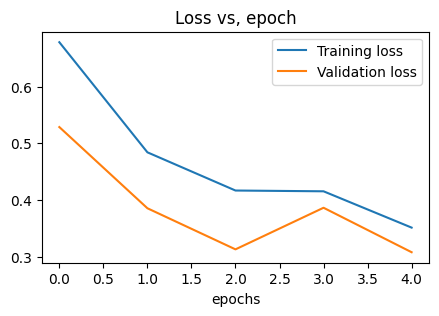

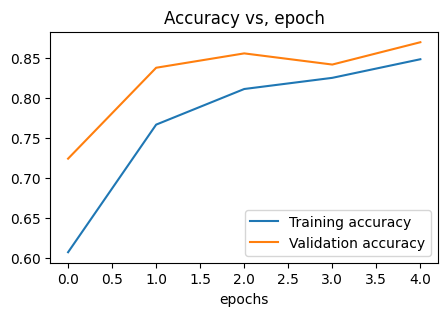

In [60]:
# Check our model's training curve
plot_loss_curve(history_8)

**Practice** - Improving the model by using best learning rate

Using epochs = 10 to for a wider range to find a optimal learning rate

In [61]:
# Create the model
model_9 = Sequential([
    Conv2D(10, 3, activation = "relu", input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = "sigmoid")
])

# Compile the model
model_9.compile(loss = 'binary_crossentropy',
        optimizer = "Adam",
        metrics = ['accuracy'])

# Create a learning_rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/10))

# Fit the model
history_9 = model_9.fit(train_data_argumented_shuffled,
              epochs = 40,
              steps_per_epoch = len(train_data_argumented_shuffled),
              validation_data = train_data,
              validation_steps = len(train_data),
              callbacks = [lr_scheduler]
             )

Epoch 1/40
47/47 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.5294 - loss: 0.6974 - val_accuracy: 0.6853 - val_loss: 0.6731 - learning_rate: 1.0000e-04
Epoch 2/40
47/47 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.7058 - loss: 0.6624 - val_accuracy: 0.7587 - val_loss: 0.6096 - learning_rate: 1.2589e-04
Epoch 3/40
47/47 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.7416 - loss: 0.5821 - val_accuracy: 0.7800 - val_loss: 0.5094 - learning_rate: 1.5849e-04
Epoch 4/40
47/47 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.7837 - loss: 0.4992 - val_accuracy: 0.7987 - val_loss: 0.4564 - learning_rate: 1.9953e-04
Epoch 5/40
47/47 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.8046 - loss: 0.4541 - val_accuracy: 0.8047 - val_loss: 0.4389 - learning_rate: 2.5119e-04
Epoch 6/40
47/47 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.7974 - loss: 0.4573 - val_accuracy: 0.8060 - val_loss: 0.4375 - learning_rate: 3.1623e-04
Epoch 7/40
47/47 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.8127 - loss:

In [62]:
lrs = 1e-4*10**(tf.range(40)/10)
lrs, len(lrs)

(<tf.Tensor: shape=(40,), dtype=float64, numpy=
 array([1.00000000e-04, 1.25892541e-04, 1.58489319e-04, 1.99526231e-04,
        2.51188643e-04, 3.16227766e-04, 3.98107171e-04, 5.01187234e-04,
        6.30957344e-04, 7.94328235e-04, 1.00000000e-03, 1.25892541e-03,
        1.58489319e-03, 1.99526231e-03, 2.51188643e-03, 3.16227766e-03,
        3.98107171e-03, 5.01187234e-03, 6.30957344e-03, 7.94328235e-03,
        1.00000000e-02, 1.25892541e-02, 1.58489319e-02, 1.99526231e-02,
        2.51188643e-02, 3.16227766e-02, 3.98107171e-02, 5.01187234e-02,
        6.30957344e-02, 7.94328235e-02, 1.00000000e-01, 1.25892541e-01,
        1.58489319e-01, 1.99526231e-01, 2.51188643e-01, 3.16227766e-01,
        3.98107171e-01, 5.01187234e-01, 6.30957344e-01, 7.94328235e-01])>,
 40)

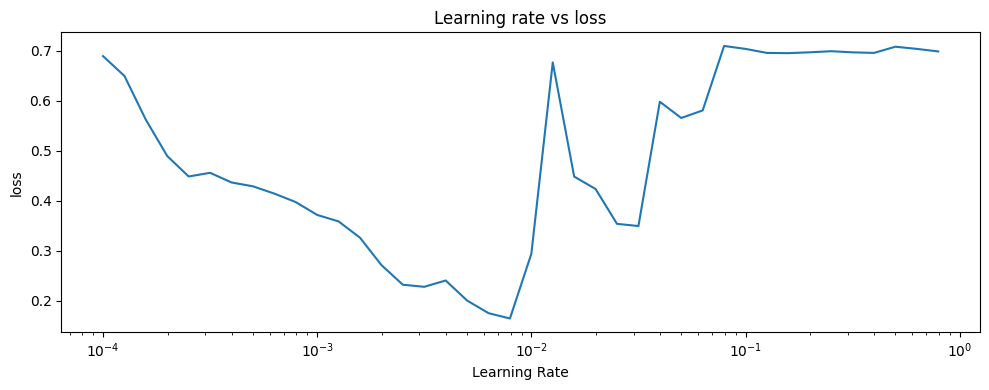

In [63]:
plt.figure(figsize = (10,4))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("loss")
plt.title("Learning rate vs loss")
plt.tight_layout()

**The optimal learning rate = 0.01**

**Practice** - Rebuild a model using the optimal learning rate


In [64]:
# Create the model
model_10 = Sequential([
    Conv2D(10, 3, activation = "relu", input_shape = (224,224,3)),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),

    Flatten(),
    Dense(1, activation = "sigmoid")
])

# Comoile the model
model_10.compile(loss = "binary_crossentropy",
         optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
         metrics = ["accuracy"]
        )

# Fit the model
history_10 = model_10.fit(train_data_argumented_shuffled,
              epochs = 5,
              steps_per_epoch = len(train_data_argumented_shuffled),
              validation_data = train_data,
              validation_steps = len(train_data)
              )

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.4929 - loss: 0.7758 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.4813 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6921
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.5208 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - accuracy: 0.4745 - loss: 0.6935 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.4893 - loss: 0.6935 - val_accuracy: 0.5000 - val_loss: 0.6932


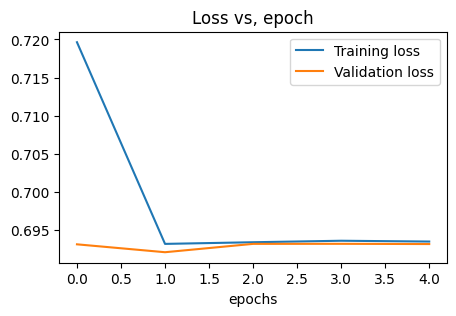

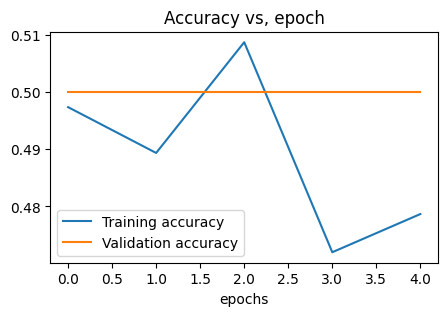

In [65]:
# Check our model's training curve
plot_loss_curve(history_10)

## Making a prediction of our trained model on our own custom data


In [66]:
# Classes we are working with
print(class_names)

['pizza' 'steak']


In [67]:
# -q is for "quiet"
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

In [68]:
steak = mpimg.imread("03-steak.jpeg")

In [69]:
steak.shape

(4032, 3024, 3)

In [71]:
model_8.predict(steak)

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("sequential_7_1/Cast:0", shape=(32, 3024, 3), dtype=float32). Expected shape (None, 224, 224, 3), but input has incompatible shape (32, 3024, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 3024, 3), dtype=uint8)
  • training=False
  • mask=None
  • kwargs=<class 'inspect._empty'>

In [72]:
expanded_steak = tf.expand_dims(steak, axis = 0)
expanded_steak.shape

TensorShape([1, 4032, 3024, 3])

In [76]:
model_8.predict(expanded_steak)

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_12" is incompatible with the layer: expected axis -1 of input shape to have value 86528, but received input with shape (1, 24160256)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 4032, 3024, 3), dtype=uint8)
  • training=False
  • mask=None
  • kwargs=<class 'inspect._empty'>

**Note:**

> When you train a neural network and you ant to make a prediction on your own custom image, it is important that the image is preprocessed into the format your model is trained on

In [75]:
#　Create a function to import and resize the image to be used with our model
def load_and_prep_image(filename, img_shape = 224):

  """Read the image from filename  turns it into a tensor and reshapes it to (img_shape, immg_shape, color_channels)"""\

  # Read in the image
  img = tf.io.read_file(filename)
  # Decode a read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size = [img_shape, img_shape])
  # Normalize the image
  img = img/255.

  return img

**Resource:** https://www.tensorflow.org/tutorials/load_data/images

In [77]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg", img_shape = 224)
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [78]:
tf.expand_dims(steak, axis = 0).shape

TensorShape([1, 224, 224, 3])

In [79]:
# Let's make predictions
pred = model_8.predict(tf.expand_dims(steak, axis = 0))
pred

# returns a prediction probability

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step


array([[0.917309]], dtype=float32)

In [80]:
# Turn prediction probabilty of classes
class_names

array(['pizza', 'steak'], dtype='<U5')

In [81]:
# We can index the prediction class by roundifng the prediction probabiliy and indexing it on class names
pred_class = class_names[int(tf.round(pred))]
pred_class

np.str_('steak')

In [82]:
def pred_and_plot(model, filename, class_names):
  """ import an image make a prediction using the model and plot the image with the predicted class with the title"""
  # Import the tareget image and preprowcess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis = 0))

  # Predict class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis = False

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


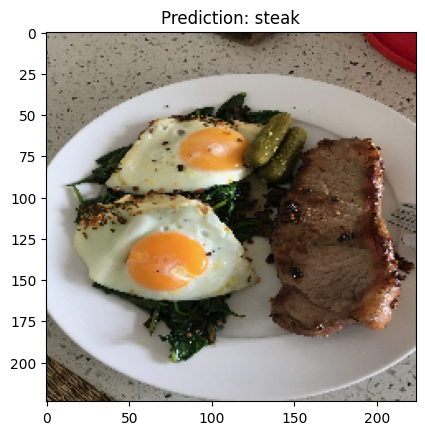

In [83]:
# Test our model on a custom image
pred_and_plot(model_8,"03-steak.jpeg", class_names)

--2025-08-07 05:34:09--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.1’

03-pizza-dad.jpeg.1 100%[===================>]   2.74M  --.-KB/s    in 0.05s   

2025-08-07 05:34:09 (50.5 MB/s) - ‘03-pizza-dad.jpeg.1’ saved [2874848/2874848]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


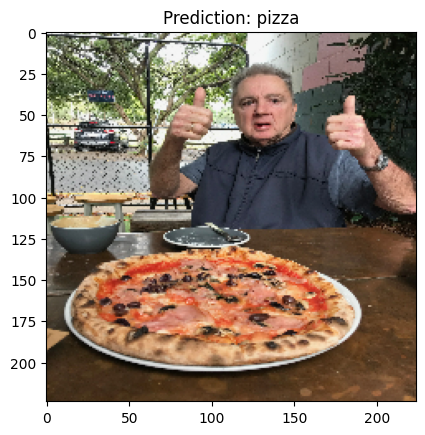

In [84]:
# Download another test image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_8, "03-pizza-dad.jpeg", class_names)

# Multiclass image classification

1. Familiar with the data
2. Preprocee the data
3. Create the nodel
4. Fit the model (overfit to make sure it works)
5. Evaluate the model
6. Adjust different hyper-parameters and improve the model (try to beat the baseline / reduce overfitting)
7. Repeat until satisfied


## Import and become one with the data

In [85]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2025-08-07 05:34:10--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.117.207, 173.194.202.207, 173.194.203.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.117.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  71.4MB/s    in 8.7s    

2025-08-07 05:34:19 (57.1 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [86]:
# This function load the data from the zip file_link to colab

import zipfile
import os
import requests # A more robust alternative to wget for production code

def download_and_unzip(url, save_path):

   """ Download a zipfile form a url and extract the content
      Args:
      url(str): the path of rul to download
      save_path: the local path to save the file
   """

   print(f"download file from {url}...")
   response = requests.get(url, stream = True)
   response.raise_for_status()

   with open(save_path, 'wb') as f:
    for chunk in response.iter_content(chunk_size=8192):
      f.write(chunk)
   print(f"file save to {save_path}...")

   # Unzip the files
   print(f"unzipping {save_path}...")
   with zipfile.ZipFile(save_path, "r") as zip_ref:
    zip_ref.extractall()
   print("Unzipping complete.")

   # Optional: Remove the zip file after extraction
   os.remove(save_path)
   print(f"Removed zip file: {save_path}")

**requests.get()**

method in Python, part of the widely used requests library, is employed to send HTTP GET requests to a specified URL. This method is primarily used to retrieve data from a web server without modifying any server-side resources.

**raise_for_status()**

method in Python's requests library is a convenient way to handle HTTP errors. It is called on the Response object returned by an HTTP request (like requests.get()).

In [87]:
download_and_unzip("https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip", "test")

download file from https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip...
file save to test...
unzipping test...
Unzipping complete.
Removed zip file: test


In [88]:
import os

# Walk through 10 classes of image data
for dir_paths, dir_names, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dir_names)} directoris and {len(filenames)} images in {dir_paths}")

There are 2 directoris and 0 images in 10_food_classes_all_data
There are 10 directoris and 0 images in 10_food_classes_all_data/test
There are 0 directoris and 250 images in 10_food_classes_all_data/test/ice_cream
There are 0 directoris and 250 images in 10_food_classes_all_data/test/sushi
There are 0 directoris and 250 images in 10_food_classes_all_data/test/chicken_curry
There are 0 directoris and 250 images in 10_food_classes_all_data/test/pizza
There are 0 directoris and 250 images in 10_food_classes_all_data/test/grilled_salmon
There are 0 directoris and 250 images in 10_food_classes_all_data/test/hamburger
There are 0 directoris and 250 images in 10_food_classes_all_data/test/ramen
There are 0 directoris and 250 images in 10_food_classes_all_data/test/fried_rice
There are 0 directoris and 250 images in 10_food_classes_all_data/test/steak
There are 0 directoris and 250 images in 10_food_classes_all_data/test/chicken_wings
There are 10 directoris and 0 images in 10_food_classes_al

In [89]:
# Set up the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [90]:
# Let's get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


**The pathlib.Path**

class in Python's pathlib module provides an object-oriented approach to working with filesystem paths. It offers a more intuitive and platform-independent way to handle file and directory operations compared to traditional methods using modules like os and os.path.

https://keep.google.com/u/0/?source=gemini#NOTE/12-dHdcgMHIyXOKFJ_ECKJBcI2rZ_BMfQ1YTq3Il2cr-NHL24HllOEDhDmXp_k3U

['603807.jpg']


TypeError: 'bool' object is not callable

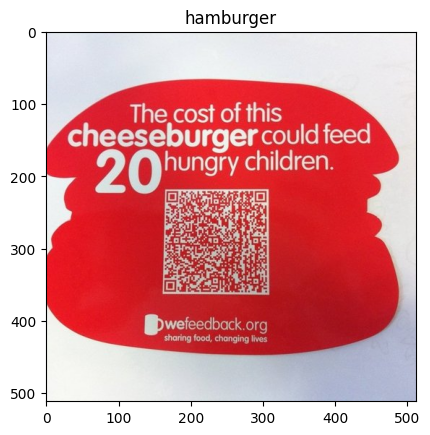

In [91]:
# Visaulize our data
import random
img = view_random_image(target_dir = train_dir,
             target_class = random.choice(class_names)
             )

**random.choice()**

is a function commonly found in programming languages, particularly in Python's random module. It is used to select a single, random element from a non-empty sequence.

Input: It takes a sequence as an argument. This sequence can be a list, tuple, string, or any other iterable object.

Output: It returns a single element randomly chosen from the input sequence.

In [92]:
random.choice(class_names)

np.str_('chicken_curry')

### 2. Preprocess the data (prepare it for the modol)

In [93]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [94]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# rescale the image
# rescale = 1/255. means that each pixel value in the images will be multiplied by 1/255
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                         target_size = (224,224),
                         class_mode = "categorical",
                         batch_size = 32
                        )
test_data = test_datagen.flow_from_directory(directory = test_dir,
                       target_size = (224,224),
                       class_mode = "categorical",
                       batch_size = 32
                       )

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


**tf.keras.preprocessing.image.ImageDataGenerator**

 is a powerful utility for real-time data augmentation and preprocessing of image data, commonly used in deep learning for computer vision tasks.

### 3. Create the model (start with a baseline)


In [95]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [96]:
# Create the model
model_11 = Sequential([
    Conv2D(10, 3, activation = "relu", input_shape = (224,224,3)),  # filters = 10, kerel_size = 3
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation = "softmax")                   # output class = 10, use softmax for multi-class classification
])

# Compile the model
model_11.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
        optimizer = tf.keras.optimizers.Adam(),
        metrics = ["accuracy"]
        )

* **rescale = 1/255.**: This operation normalizes the pixel values of images. It scales the pixel values, which originally range from 0 to 255, down to a new range of 0 to 1. This is a crucial preprocessing step for improving the performance of machine learning models.

* Why pixel values are 0-255: This range is due to the common use of an 8-bit system to represent each color channel (Red, Green, Blue) in a digital image. An 8-bit number can represent 2
8
 =256 different values, which, when starting from 0, gives a range from 0 to 255.

* **input_shape = (224, 224, 3)**: This defines the expected dimensions of the input images for the neural network. (224, 224) specifies the height and width in pixels, while 3 indicates that the images are in the RGB color format.

* The (224, 224, 3) dimension is a well-established standard primarily because it was the input size for foundational, successful CNN architectures. It strikes a balance between preserving image detail and keeping training computationally feasible.

* Relationship: The rescale and input_shape are both essential preprocessing steps that work together. input_shape specifies the physical dimensions of the images the model expects, while rescale handles the numerical values of the pixels within those dimensions.

### 4. Fit a model

In [ ]:
# Fit the model
history_11 = model_11.fit(train_data,
              epochs = 5,
              steps_per_epoch = len(train_data),
              validation_data = test_data,
              validation_steps = len(test_data)
              )

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 572s 2s/step - accuracy: 0.1696 - loss: 2.2381 - val_accuracy: 0.3064 - val_loss: 1.9391
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 575s 2s/step - accuracy: 0.3575 - loss: 1.8491 - val_accuracy: 0.3664 - val_loss: 1.8162
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 603s 2s/step - accuracy: 0.4449 - loss: 1.6342 - val_accuracy: 0.3724 - val_loss: 1.8388
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 543s 2s/step - accuracy: 0.6017 - loss: 1.1991 - val_accuracy: 0.3488 - val_loss: 1.9846
Epoch 5/5
 58/235 ━━━━━━━━━━━━━━━━━━━━ 6:09 2s/step - accuracy: 0.8314 - loss: 0.6022

In [ ]:
len(train_data), len(test_data)

**An epoch is one complete pass through the entire training dataset.**

**steps_per_epoch** = (Total number of samples in the training dataset) / (Batch size)

Let's break down why this is the case:

* Epoch: One complete pass through the entire training dataset.

* Batch Size: The number of samples processed at one time in a single step.

* Step: One update of the model's weights after processing a single batch.

To complete one full epoch (i.e., see every single training sample once), the model needs to perform enough "steps" to process all the samples. Since each step processes a batch of samples, the number of steps required is simply the total number of samples divided by the size of each batch.

**The primary reason we need to set the steps_per_epoch parameter** **is to define what an "epoch" is when training with a data generator.**

* The Problem: Data generators, like ImageDataGenerator, create an endless stream of image batches. Without a counter, the training loop would not know when it has seen every image in the dataset once.

* The Solution: steps_per_epoch tells the training loop exactly how many batches to draw from the generator to constitute one complete pass through the entire training dataset.

In short, it's a necessary parameter that acts as a manual "counter" to properly pace the training and ensure the model sees all the data in each epoch.

### 5. Evaluate the model

In [ ]:
# Evaluate on the test data
model_11.evaluate(test_data)

In [ ]:
# Check out the model' loss curves
plot_loss_curve(history_11)

Whar do these loss curves tell us?

It seems the model is **overfitting** te training set

### 6. Adjust the odel's hyperparameters (improve the baseline / reduce overfitting)

Let's try to fix overfitting by:

* **Get more data**
* **Simplify the model** (model may be too complex): reduce the number of layers or reduce number of neurons in a layer
* **Use data argumentation** - manipulate the trainign data to add more diversity without altering the original data
* **Use transfer learning** - leverages the patterns another model has laerned on similar data you own and allow you to use those patterns on your datasets


In [ ]:
model_11.summary()

In [ ]:
# How about we try ad simply the model first
# Let's try to remove 2 Conv2D layers
model_12 = Sequential([
    Conv2D(10, 3, activation = "relu", input_shape = (224,224,3)),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation = "softmax")
])

# Compile the model
model_12.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
         optimizer = tf.keras.optimizers.Adam(),
         metrics = ['accuracy']
        )

# Fit the model
history_12 = model_12.fit(train_data,
      epochs = 5,
      steps_per_epoch = len(train_data),
      validation_data = test_data,
      validation_steps = len(test_data)
      )

In [ ]:
model_12.summary()

In [ ]:
# Evaluate on the test data
model_12.evaluate(test_data)

In [ ]:
# Plot the loss curve
plot_loss_curve(history_12)

**Simplifying model** does not work, the accuracy is decreasing and the overfitting still exists, reducing the number of Conv2D layers wull decrease the features available for model to learn, thus making the model worse

model_11: Total params: 851,762 (3.25 MB)

model_12: Total params: 878,402 (3.35 MB)

Let's try **data argumentation**

### Trying to reduce overfitting with data argumentation

Le's try to improve our model's result by suing the argumented trning data

In [ ]:
# Create argumented data
train_datagen_argumented = ImageDataGenerator(rescale = 1/255.,
                       rotation_range = 0.2,
                       width_shift_range = 0.2,
                       height_shift_range = 0.2,
                       zoom_range = 0.2,
                       horizontal_flip = True
                      )
train_data_argumented = train_datagen_argumented.flow_from_directory(train_dir,
                                   target_size = (224,224),
                                   batch_size = 32,
                                   class_mode = "categorical"
                                   )

In [ ]:
# Let's create another model but this time we will fit on te argumented training data

# Set random ssed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.models.clone_model(model_12)

# Compile the model
model_13.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
         optimizer = tf.keras.optimizers.Adam(),
         metrics = ['accuracy']
        )

# Fit the model (with argumented training data)
history_13 = model_13.fit(train_data_argumented,
              epochs = 5,
              steps_per_epoch = len(train_data_argumented),
              validation_data = test_data,
              validation_steps = len(test_data)
              )

The training time is increased because the argumented image is first processed in CPU


**tf.keras.models.clone_model()**

function creates a new model with the same architecture as an existing model, but it doesn't copy the weights or training state. Instead, it initializes the new model with a fresh set of weights. **This function is useful for creating a new model with the exact same layers and configurations** as a previously defined model, without having to redefine the architecture from scratch.

In [ ]:
model_13.evaluate(test_data)

In [ ]:
import matplotlib.pyplot as plt
# Plot loss curves
plot_loss_curve(history_13)

That looks much better, the loss curves are more closer to each other tyan the baseline model, and looks like they are heading to the right direction, if we train it for longer, we might see further improvements

### 7. Repeat until satisfied

Improve our model
- restructuring model architecture (increasing layers / hidden units)
- adjust learnin rate
- try different methods of data argumentation (adjust hyperparameters in ImageDataGenerator)
- training for longer (e.g. 10 epochs)
- try **transfer learning**

### Make a prediction using the trained model

In [ ]:
class_names

In [ ]:
# Download some custom images
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

In [ ]:
# Reconfigure pred_and_plt to work with multi-class images
# previous function is only suitable for binary image outcome

def pred_and_plot(model, filename, class_names):
  """ import an image make a prediction using the model and plot the image with the predicted class with the title"""
  # Import the tareget image and preprowcess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis = 0))

  # Add-in logic for multi-class and get pred_class names
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis = False

In [ ]:
# Make a prediction using model_13
pred_and_plot(model = model_13, filename = "03-hamburger.jpeg", class_names = class_names)

The model is not performing well on the test dataset (0.3 accuracy)

## Saving and loading our trained model

In [ ]:
# save a model
model_13.save("saved_trained_model_13")

In [ ]:
# Load in the trained model and evaluate it
loaded_model_13 = tf.keras.models.load_model("saved_trained_model_13")
loaded_model_13.evaluate(test_data)